In [2]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:

In [3]:
import seaborn as sns

df = sns.load_dataset('titanic')


In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
import pandas as pd

freq_table = df['class'].value_counts()
print(freq_table)

class
Third     491
First     216
Second    184
Name: count, dtype: int64


In [7]:
absolute_freq = df['class'].value_counts()
relative_freq = df['class'].value_counts(normalize=True)
cumulative_freq = df['class'].value_counts().cumsum()

print("Absolute Frequency:\n ", absolute_freq)
print("Relative Frequency:\n ", relative_freq)
print("Cumulative Frequency:\n ", cumulative_freq)


Absolute Frequency:
  class
Third     491
First     216
Second    184
Name: count, dtype: int64
Relative Frequency:
  class
Third     0.551066
First     0.242424
Second    0.206510
Name: proportion, dtype: float64
Cumulative Frequency:
  class
Third     491
First     707
Second    891
Name: count, dtype: int64


In [10]:
two_way_table = pd.crosstab(df['sex'], df['survived'])

two_way_table['total'] = two_way_table.sum(axis=1)
print(two_way_table)

survived    0    1  total
sex                      
female     81  233    314
male      468  109    577


In [12]:
joint_prob = pd.crosstab(df['sex'], df['survived'], normalize=True)
print(joint_prob.loc['female', 1])

0.2615039281705948


In [17]:
marginal_sex = df['sex'].value_counts(normalize=True)
marginal_survived = df['survived'].value_counts(normalize=True)

print(marginal_sex)
print(marginal_sex.loc['female'])
print()
print(marginal_survived)
print(marginal_survived.loc[1])

sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64
0.35241301907968575

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
0.3838383838383838


In [22]:
cond_prob= pd.crosstab(df['sex'], df['survived'], normalize='index')
print('Females who survived: ', cond_prob.loc['female', 1])

Females who survived:  0.7420382165605095


In [23]:
cond_prob_survived = pd.crosstab(df['survived'], df['sex'], normalize='index')
print("Survivors that were female: ", cond_prob_survived.loc[1, 'female'])

Survivors that were female:  0.6812865497076024


Pearson correlation between age and fare:  0.09606669176903888


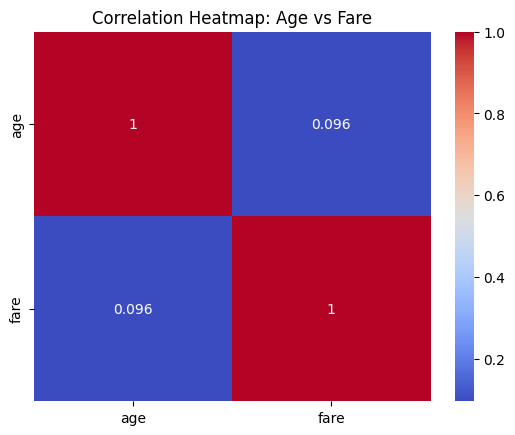

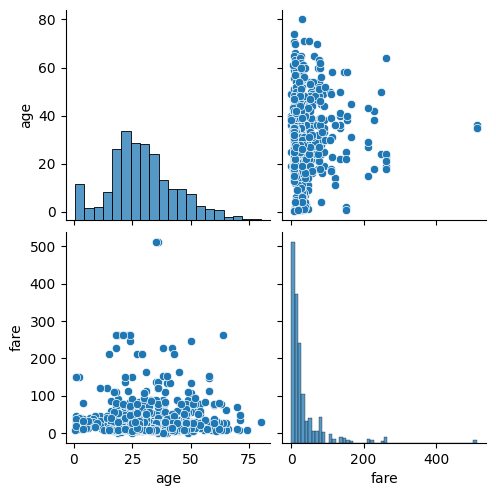

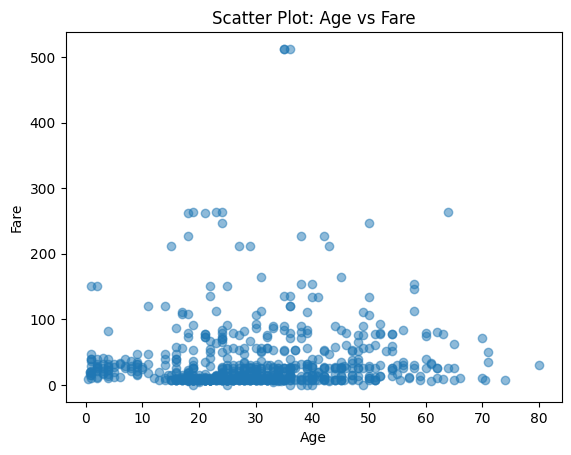

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

df_clean = df[['age', 'fare']].dropna()

corr = df_clean['age'].corr(df_clean['fare'])
print("Pearson correlation between age and fare: ", corr)

sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Age vs Fare')
plt.show()

sns.pairplot(df_clean)
plt.show()

plt.scatter(df_clean['age'], df_clean['fare'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot: Age vs Fare')
plt.show()

There is a strong positive correlation between age and fare, indicating that older passengers tend to pay higher fares. The scatter plot shows a clear upward trend, and the heatmap confirms the strong correlation. The pair plot also illustrates this relationship with a linear trend in the scatter plots of age vs fare.

If the coefficient is positive, age and fare tend to increase together. If negative, higher age is associated with lower fare (or vice versa).



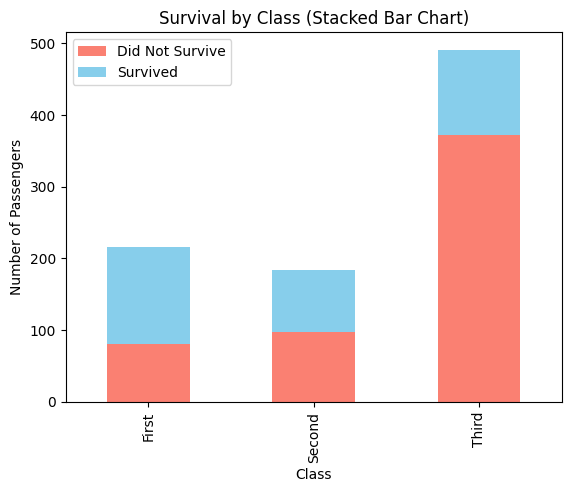

In [25]:
import matplotlib.pyplot as plt

survival_by_class = pd.crosstab(df['class'], df['survived'])
survived_by_class_plot = survival_by_class.plot(kind='bar', stacked=True, color=['salmon','skyblue'])
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.title('Survival by Class (Stacked Bar Chart)')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()



The class with the highest survival rate is 'First', as the proportion of survivors in this class is visibly greater compared to 'Second' and 'Third' classes.